In [ ]:
import numpy as np
#worst case for calculate Loss
def hinge_loss(X, y, w):
    """
    Compute Hinge Loss for multi-class classification.
    
    :param X: Input data (n, d)
    :param y: True labels (n,)
    :param w: Weights (d, c)
    :return: Scalar loss value
    """
    n, c = X.shape[0], w.shape[1]
    
    # Compute the scores (raw model outputs)
    scores = np.dot(X, w)  # (n, c)
    
    # Compute Hinge Loss
    loss = 0
    for i in range(1000):
        correct_class_score = scores[i, y[i]]  # Score for the correct class
        for j in range(c):
            if j != y[i]:  # For all classes except the correct one
                loss += max(0, 1 - correct_class_score + scores[i, j])  # Hinge Loss

    # Average the loss
    loss /= n
    return loss

# Random initialization of data
np.random.seed(0)
n_samples = 10000
n_features = 3073
n_classes = 10

X_train = np.random.randn(n_samples, n_features)  # Input data
y_train = np.random.randint(0, n_classes, size=n_samples)  # Random labels

# Searching for weights with the lowest loss
best_loss = float("inf")
best_W = None

for i in range(10000):
    w = np.random.randn(n_features, n_classes) * 0.0001  # Random initialization of weights
    loss = hinge_loss(X_train, y_train, w)  # Compute the loss
    if loss < best_loss:
        best_loss = loss
        best_W = w
    print("In attempt %d the loss was %f, best %f" % (i, loss, best_loss))


In [ ]:
# Multi calss SVM Loss function

def L_i_vectorized(x, y, W):
    scores = W.dot(x)
    margins = np.maximum(0, scores - scores[y] + 1)
    margins[y] = 0
    loss_i = np.sum(margins)
    return loss_i

### Gradient Descent

In [ ]:
import numpy as np
#Numerical gradient
def eval_numerical_gradient(f, x):
    """
    A function to compute the numerical gradient of a function f at the point x using finite differences.
    
    :param f: The function to compute the gradient for.
    :param x: The point (numpy array) at which the gradient is computed.
    :return: The gradient (numpy array) at the point x.
    """
    fx = f(x)  # Compute the value of the function at x
    grad = np.zeros_like(x)  # Initialize the gradient array (same shape as x)
    h = 0.00001  # Small step size for finite difference

    # Use np.nditer to iterate over all elements of x (supporting multi-dimensional arrays)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        ix = it.multi_index  # Get the index of the current element
        old_value = x[ix]  # Save the original value of x[ix]
        
        # Evaluate f(x + h) by adding a small step to the current element
        x[ix] += h
        fxh = f(x)  # Compute the function value at x + h
        
        # Restore the original value of x[ix]
        x[ix] = old_value

        # Compute the partial derivative using the finite difference method
        grad[ix] = (fxh - fx) / h
        
        it.iternext()  # Move to the next element

    return grad


#Numerical gradient: Approximate, time-consuming, easy to implement!
#Analytical gradient: Accurate, fast, prone to implementation errors!



In practice:

We always use the analytical gradient.
However, to ensure the correctness of the implementation, we compare the analytical gradient with the numerical gradient.

In [4]:
# Vanilla Gradient Descent Implementation

# Set the condition for continuous updates (e.g., you can break this when convergence is met)
##while True:
    # Calculate the gradient of the loss function with respect to the weights
    # 'evaluate_gradient' is a placeholder for the gradient calculation function
    ##gradient = evaluate_gradient(lossfun, data, weights)
    
    # Update the weights by subtracting the gradient (scaled by the learning rate/step size)
    ##weights += -step_size * gradient  # Gradient descent update rule

    # Optional: Add a stopping condition based on a maximum number of iterations or convergence
    # For example, you can stop the loop when the change in weights is sufficiently small
    # or when the loss function reaches a minimum threshold


A more efficient version of Mini-batch Gradient Descent can be implemented with a few optimizations to reduce redundant computations, speed up execution, and improve memory usage. Below is an optimized version of your code that utilizes vectorized operations where possible and ensures efficient mini-batch sampling and gradient evaluation.

In [ ]:
# Mini-batch Gradient Descent Implementation

# Parameters
batch_size = 256  # Size of the mini-batch (number of examples used in each iteration)

while True:
    # Sample a mini-batch of 256 training examples
    # 'sample_training_data' is a function that randomly selects a batch of data points
    data_batch = sample_training_data(data, batch_size)
    
    # Calculate the gradient of the loss function with respect to the weights
    # 'evaluate_gradient' calculates the gradient for the mini-batch of data
    gradient = evaluate_gradient(loss_fun, data_batch, weights)
    
    # Update the weights using the gradient and learning rate (step_size)
    weights += -step_size * gradient  # Gradient update rule
    
    # Optional: Add a stopping condition based on the number of iterations or convergence
    # For example, you can stop after a certain number of iterations or when the loss change is small

Common values for batch size: 32, 128, and 256.

### **Key Point: Loss Function Plotting**

To ensure the correctness of the algorithm, **the loss function should be plotted** at different intervals during training, showing a decreasing trend over time. This will confirm that the algorithm is converging and minimizing the loss as expected.

In [ ]:
# Vanilla Gradient Descent Implementation

# Set the condition for continuous updates (e.g., you can break this when convergence is met)
##while True:
    # Calculate the gradient of the loss function with respect to the weights
    # 'evaluate_gradient' is a placeholder for the gradient calculation function
    ##gradient = evaluate_gradient(lossfun, data, weights)
    
    # Update the weights by subtracting the gradient (scaled by the learning rate/step size)
    ##weights += -step_size * gradient  # Gradient descent update rule

    # Optional: Add a stopping condition based on a maximum number of iterations or convergence
    # For example, you can stop the loop when the change in weights is sufficiently small
    # or when the loss function reaches a minimum threshold


![Example GIF](https://i.sstatic.net/qAx2i.gif)

![Example GIF](https://i.sstatic.net/1obtV.gif)

### Backward Propagation of errors

***an algorithm for supervised learning of artificial neural networks using gradient descent***

# Gradient Computation and Backpropagation

So far, we've defined a **scoring function** where, for each input, we assign scores based on the weights (**W**) for each class. Using these scores, we define a **loss** for each data point. 

One of these loss functions is the **hinge loss**, and we also introduced another loss function called **logistic regression**. By averaging the losses of all the data points in the training set, we calculate the **overall loss**, which tells us how poorly the weights (**W**) are performing:
- The **higher the loss**, the worse **W** is.
- The **lower the loss**, the better.

Additionally, we discussed another term known as **regularization**, which helps us predict well even for new data.

To use the **gradient descent algorithm**, the only thing we need to do is compute the **gradient** of the loss function with respect to the **W** parameters. 

### The Challenge of Gradient Computation
We can take derivatives from simpler functions. However, the issue arises when:
- The function becomes **too complex**, with **nested structures** and **numerous parameters**.
- In some cases, there might even be **millions of parameters**, making it impractical to manually derive each one using mathematical formulas.

### The Solution: Backpropagation
To handle this, we require an **automatic method** to compute these gradients efficiently. This is precisely where the **backpropagation algorithm** comes into play, allowing us to perform these computations automatically and systematically.


![Example GIF](https://miro.medium.com/v2/resize:fit:1280/format:webp/1*VF9xl3cZr2_qyoLfDJajZw.gif)

الگوریتم بک پروپگیشن یک روش محاسباتی خودکار و اتوماتیک می باشد که در جهت به حداقل رساندن تابع لاس نسبت به پارامتر ها استفاده می شود.

که محاسبه ی گرادیان تابع لاس نسبت به پارامتر ها

الگوریتم گرادیان کاهشی با توجه به تابع لاس ، داده ها و پارامتر ها گرادیان را محاسبه می کند

و در قدم بعدی بر خلاف جهت گرادیان به اندازه ی آلفا یک قدم برمی دارد

از آنجایی که تعداد داد ها خیلی زیاد هست، در هر تکرار فقط یخشی از داده ها تحت عنوان بچ به الگوریتم داده می شود.

گرادیان را از روی بچ داده شده تخمین می زنیم

برای محاسبه ی گرادیان یک روش عددی داریم که تقریبی و زمان بر است 

در عمل هر دو را استفاده می کنیم

برای آموزش از گرادیان تحلیلی استفاده میکنیم ولی برای تایید صحت آن از گرادیان عددی کمک میگیریم

که به آن گرادیان چک می گوییم

### Forward Calcualtion Graph

![Calculation Graph.png](<attachment:Calculation Graph.png>)
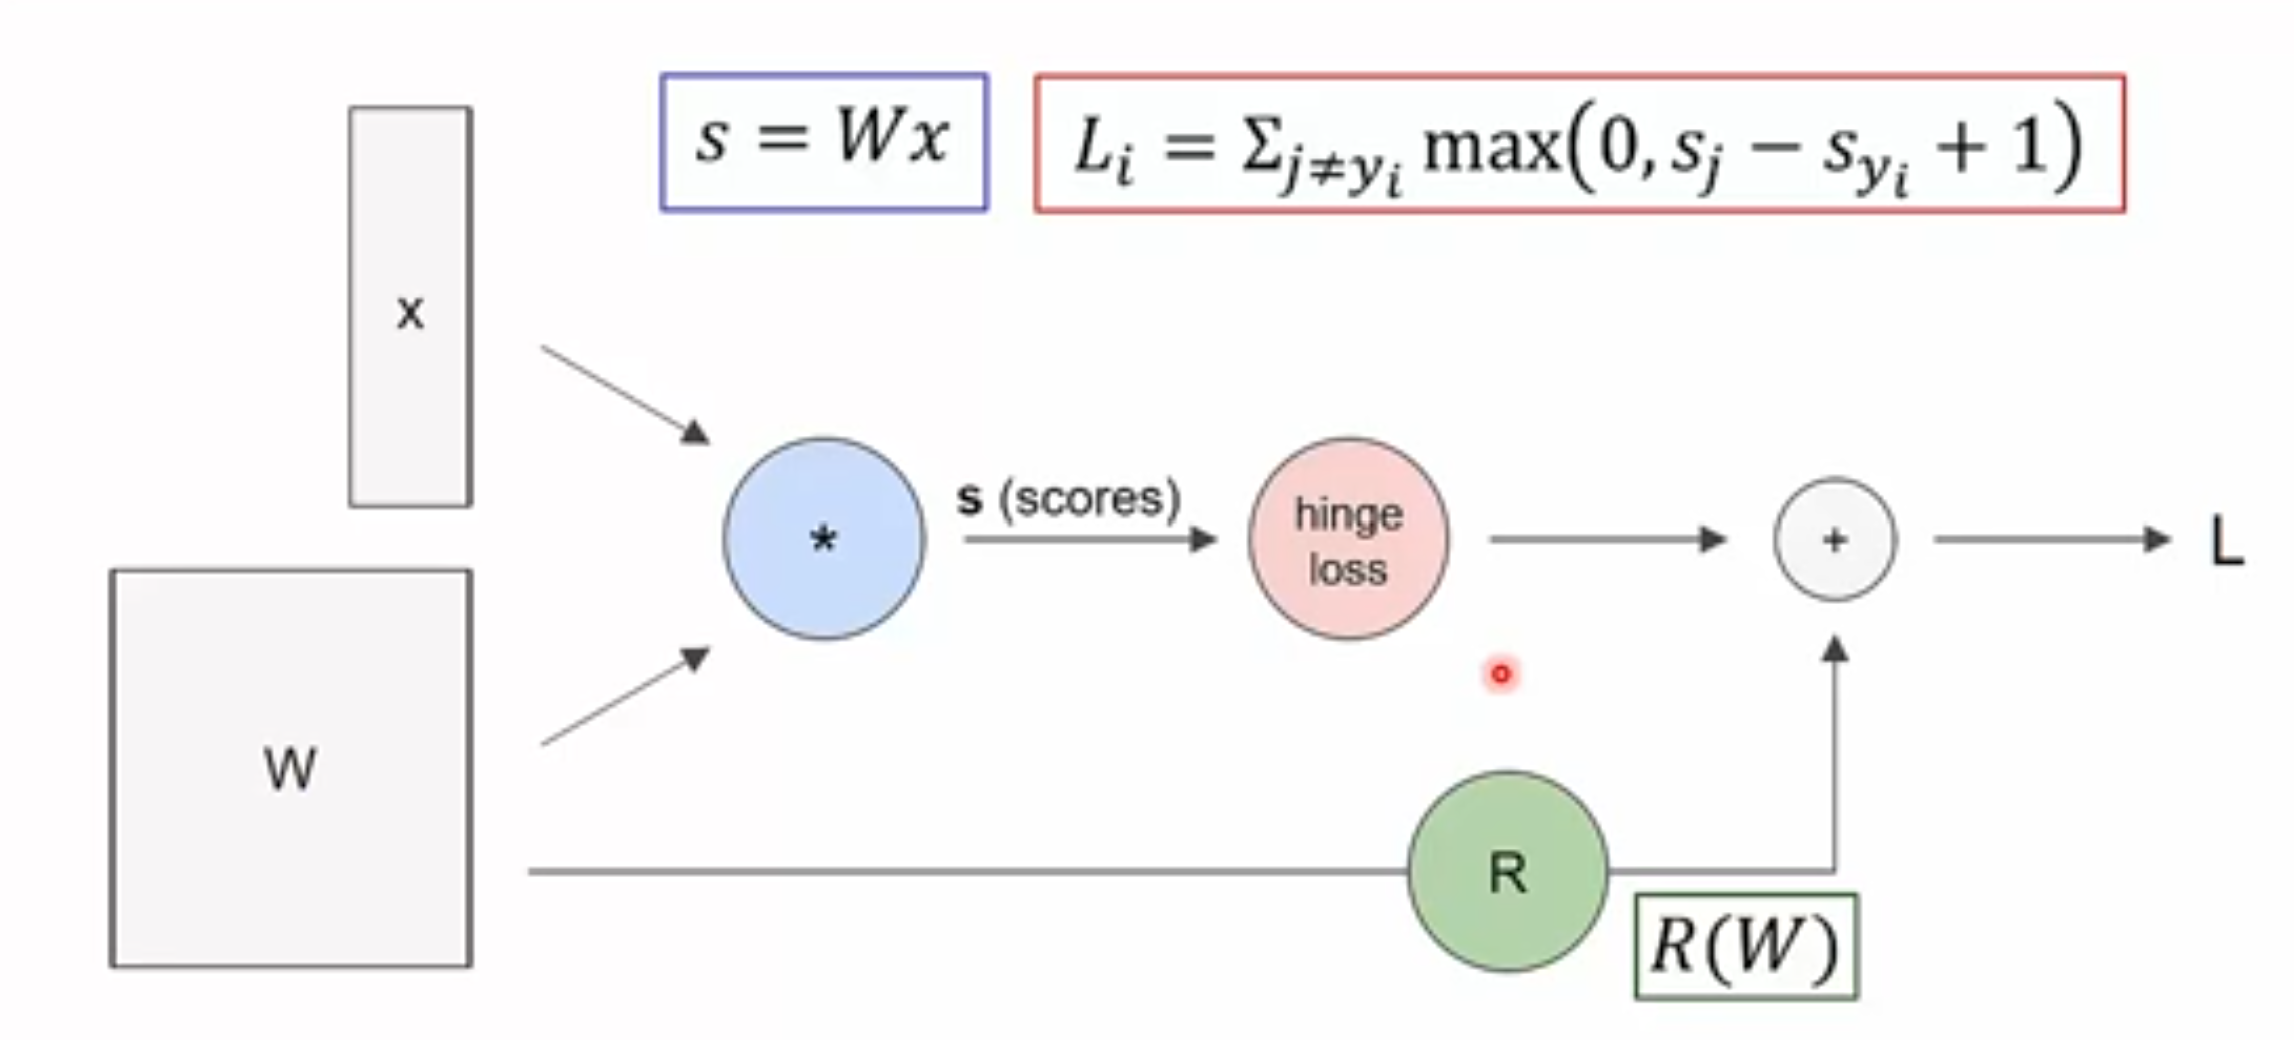

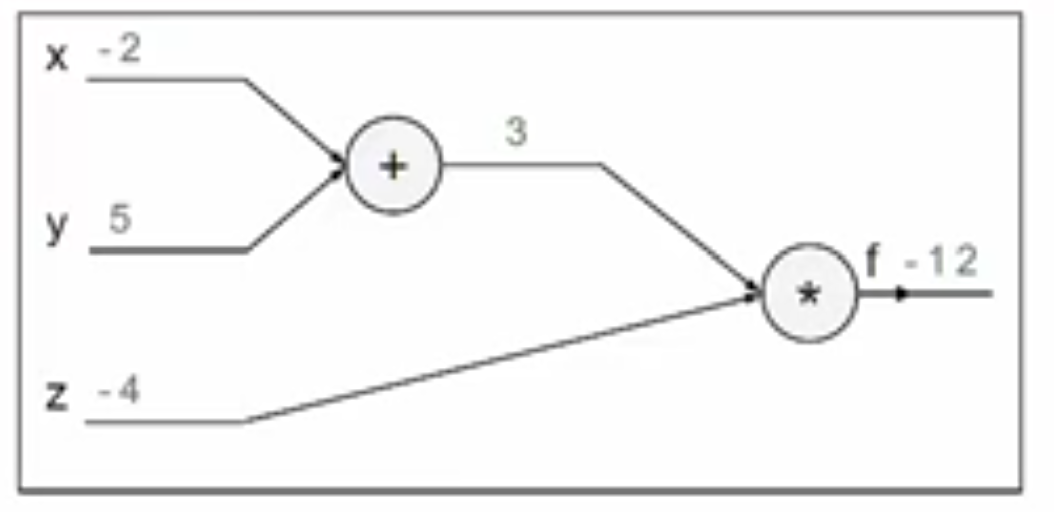

### Back

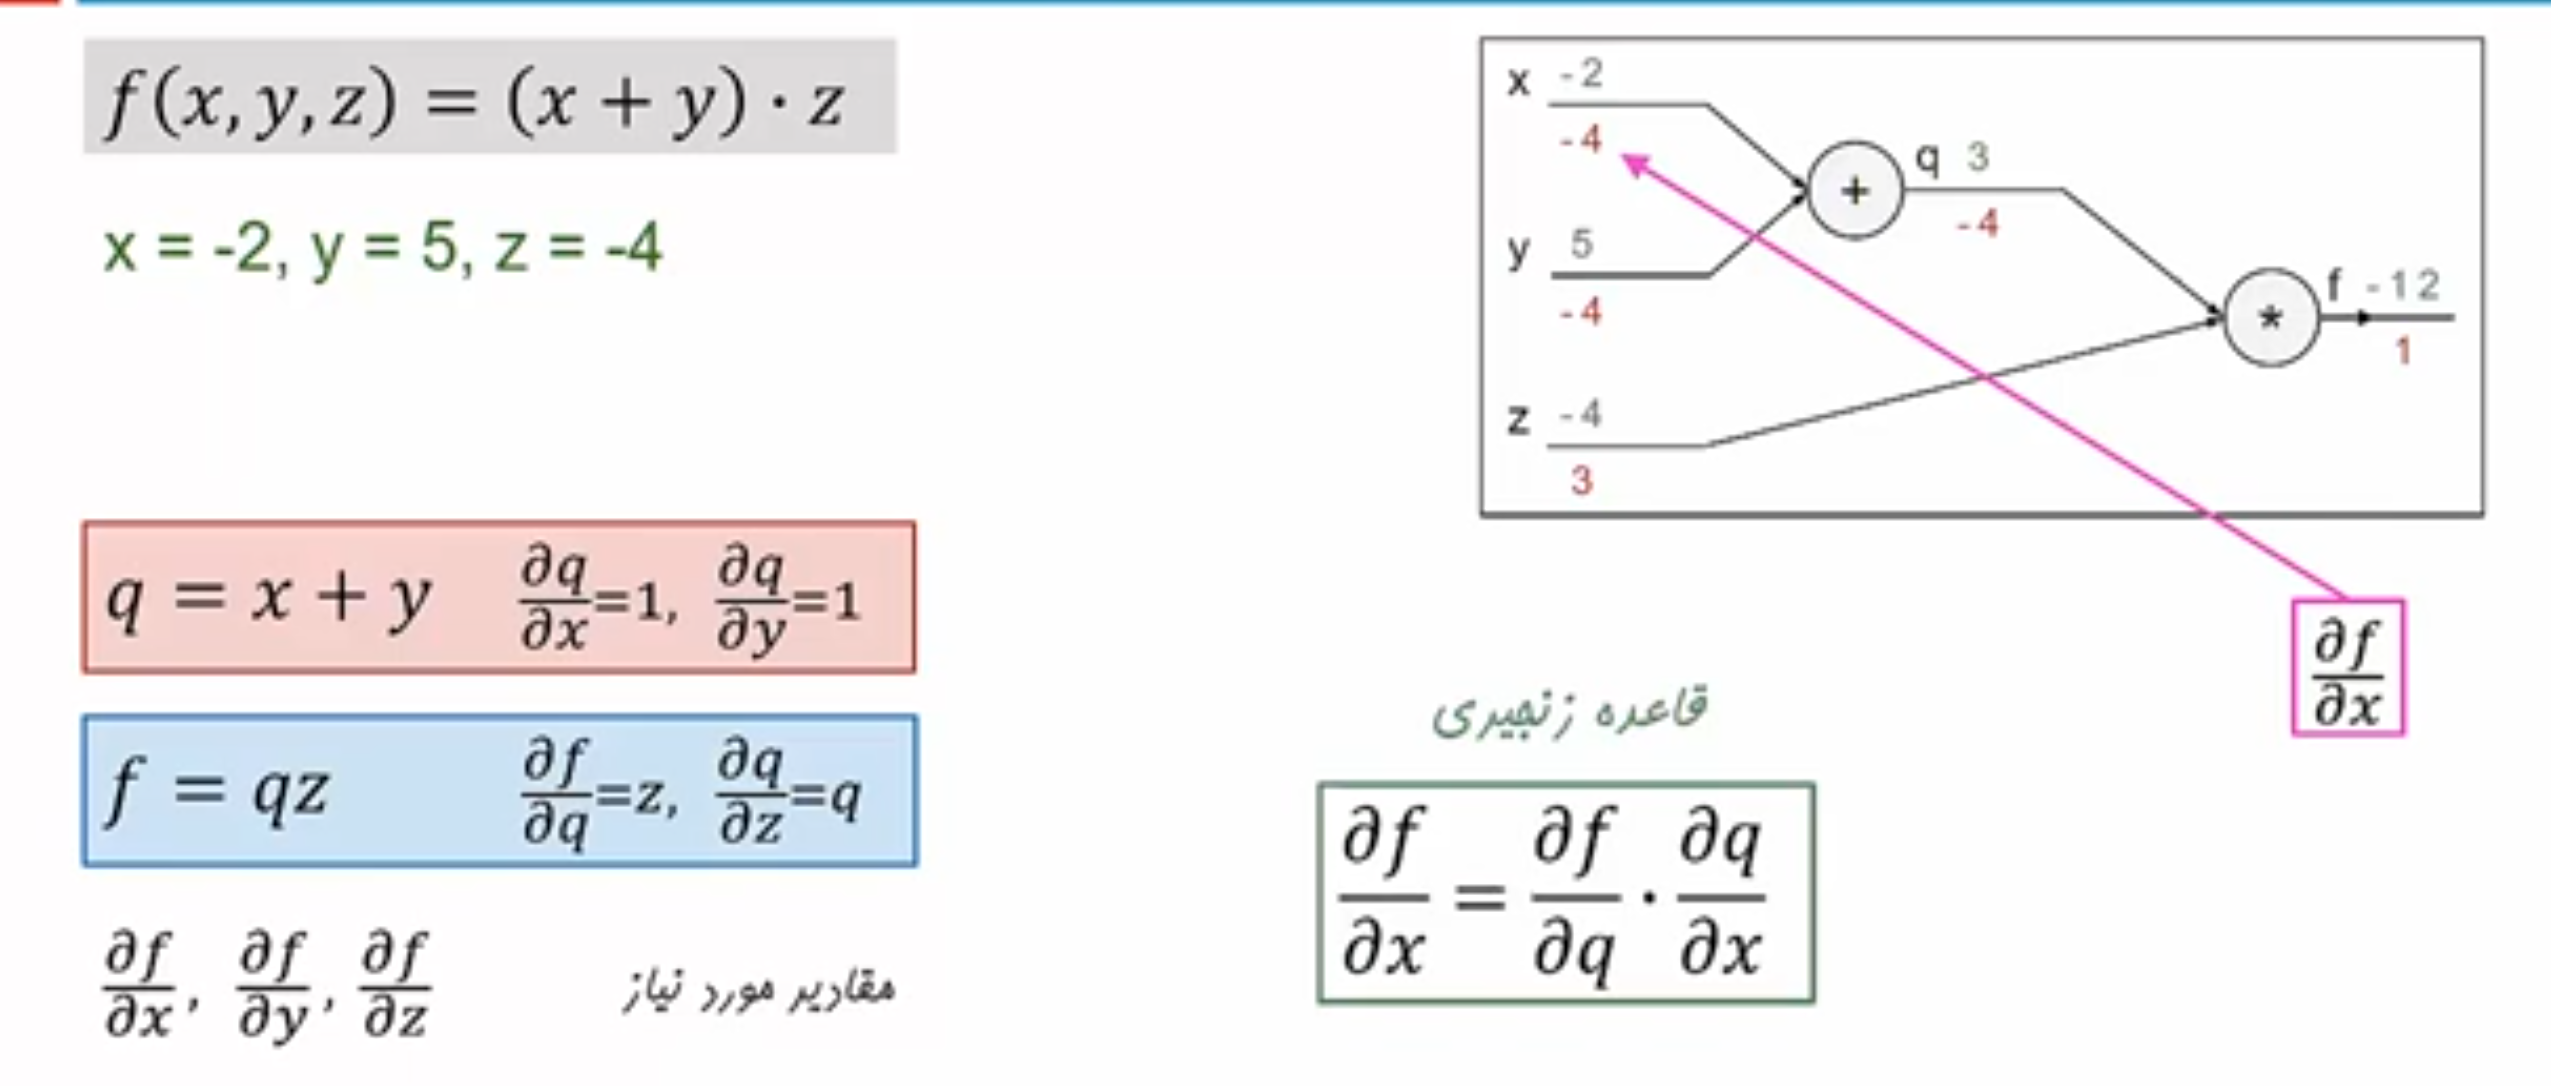

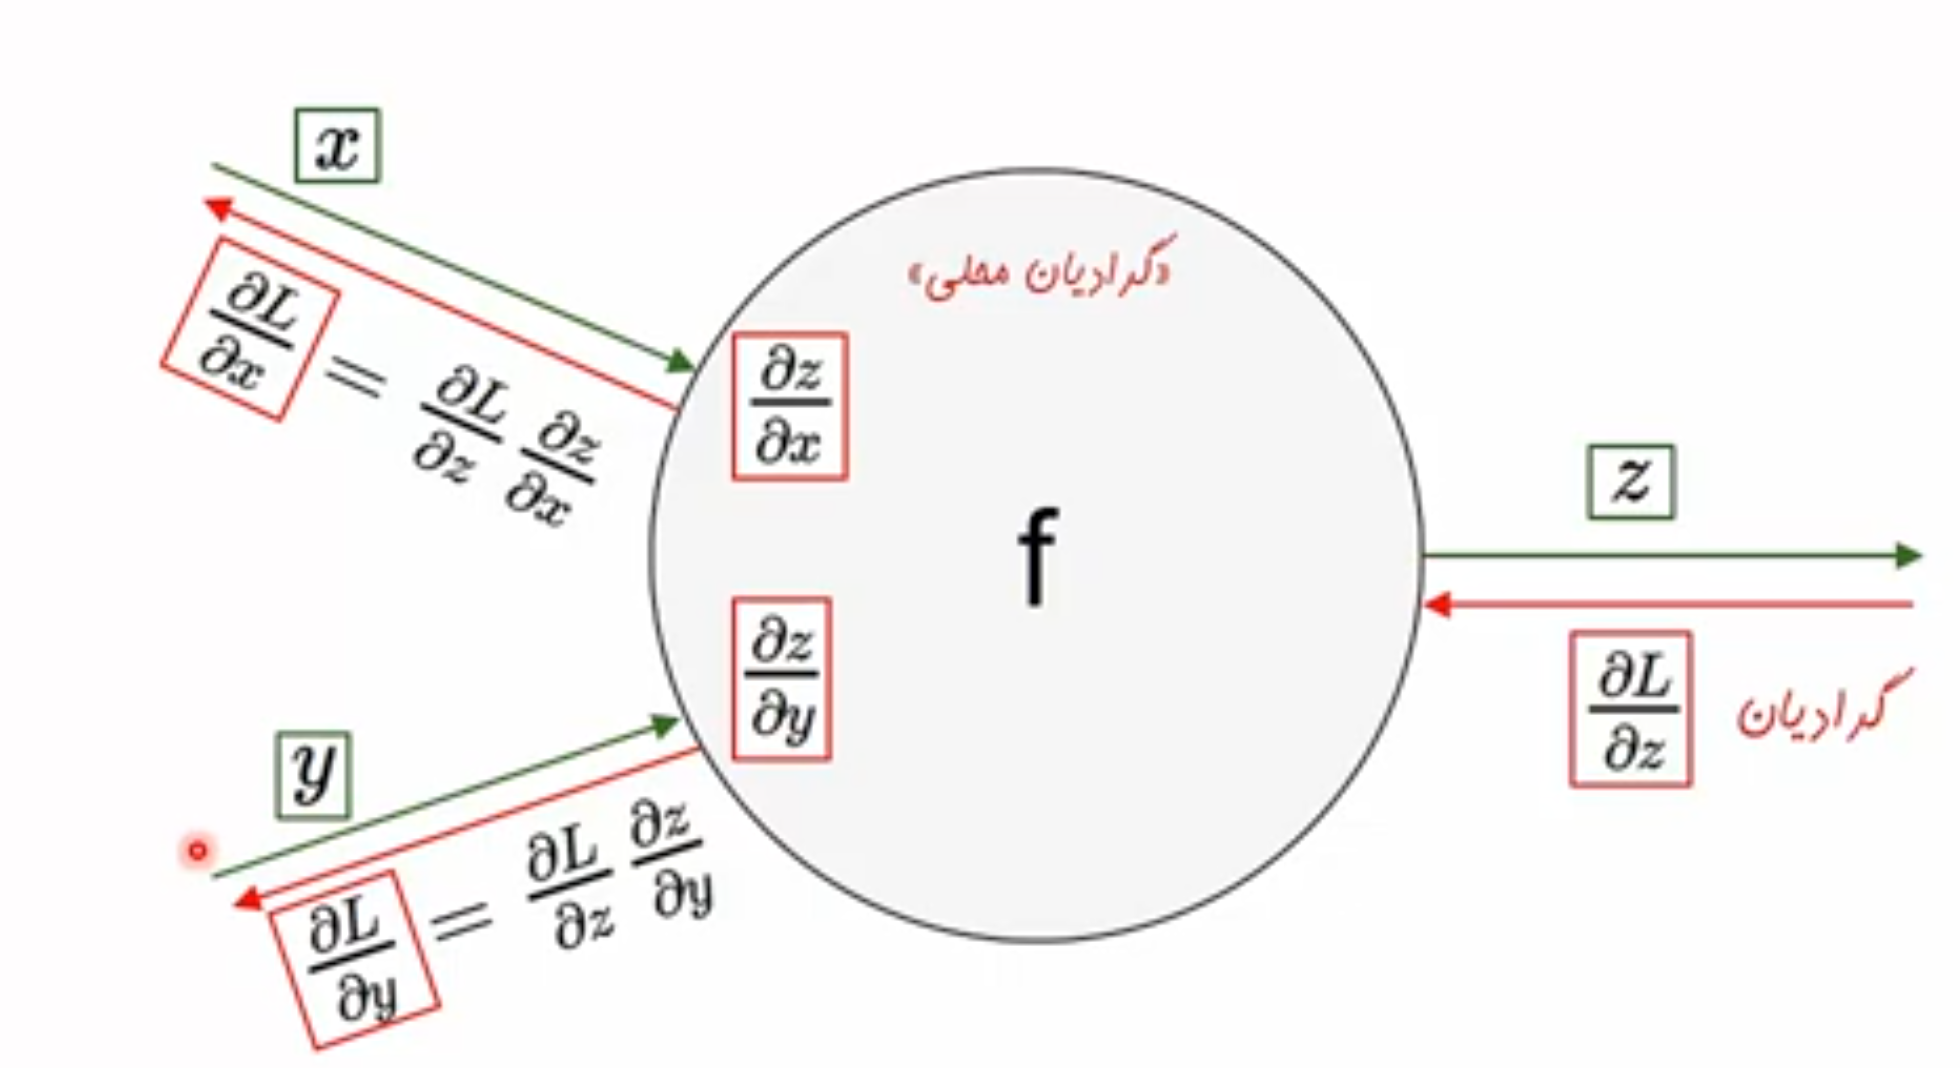

### SoftMax Calculation Graph

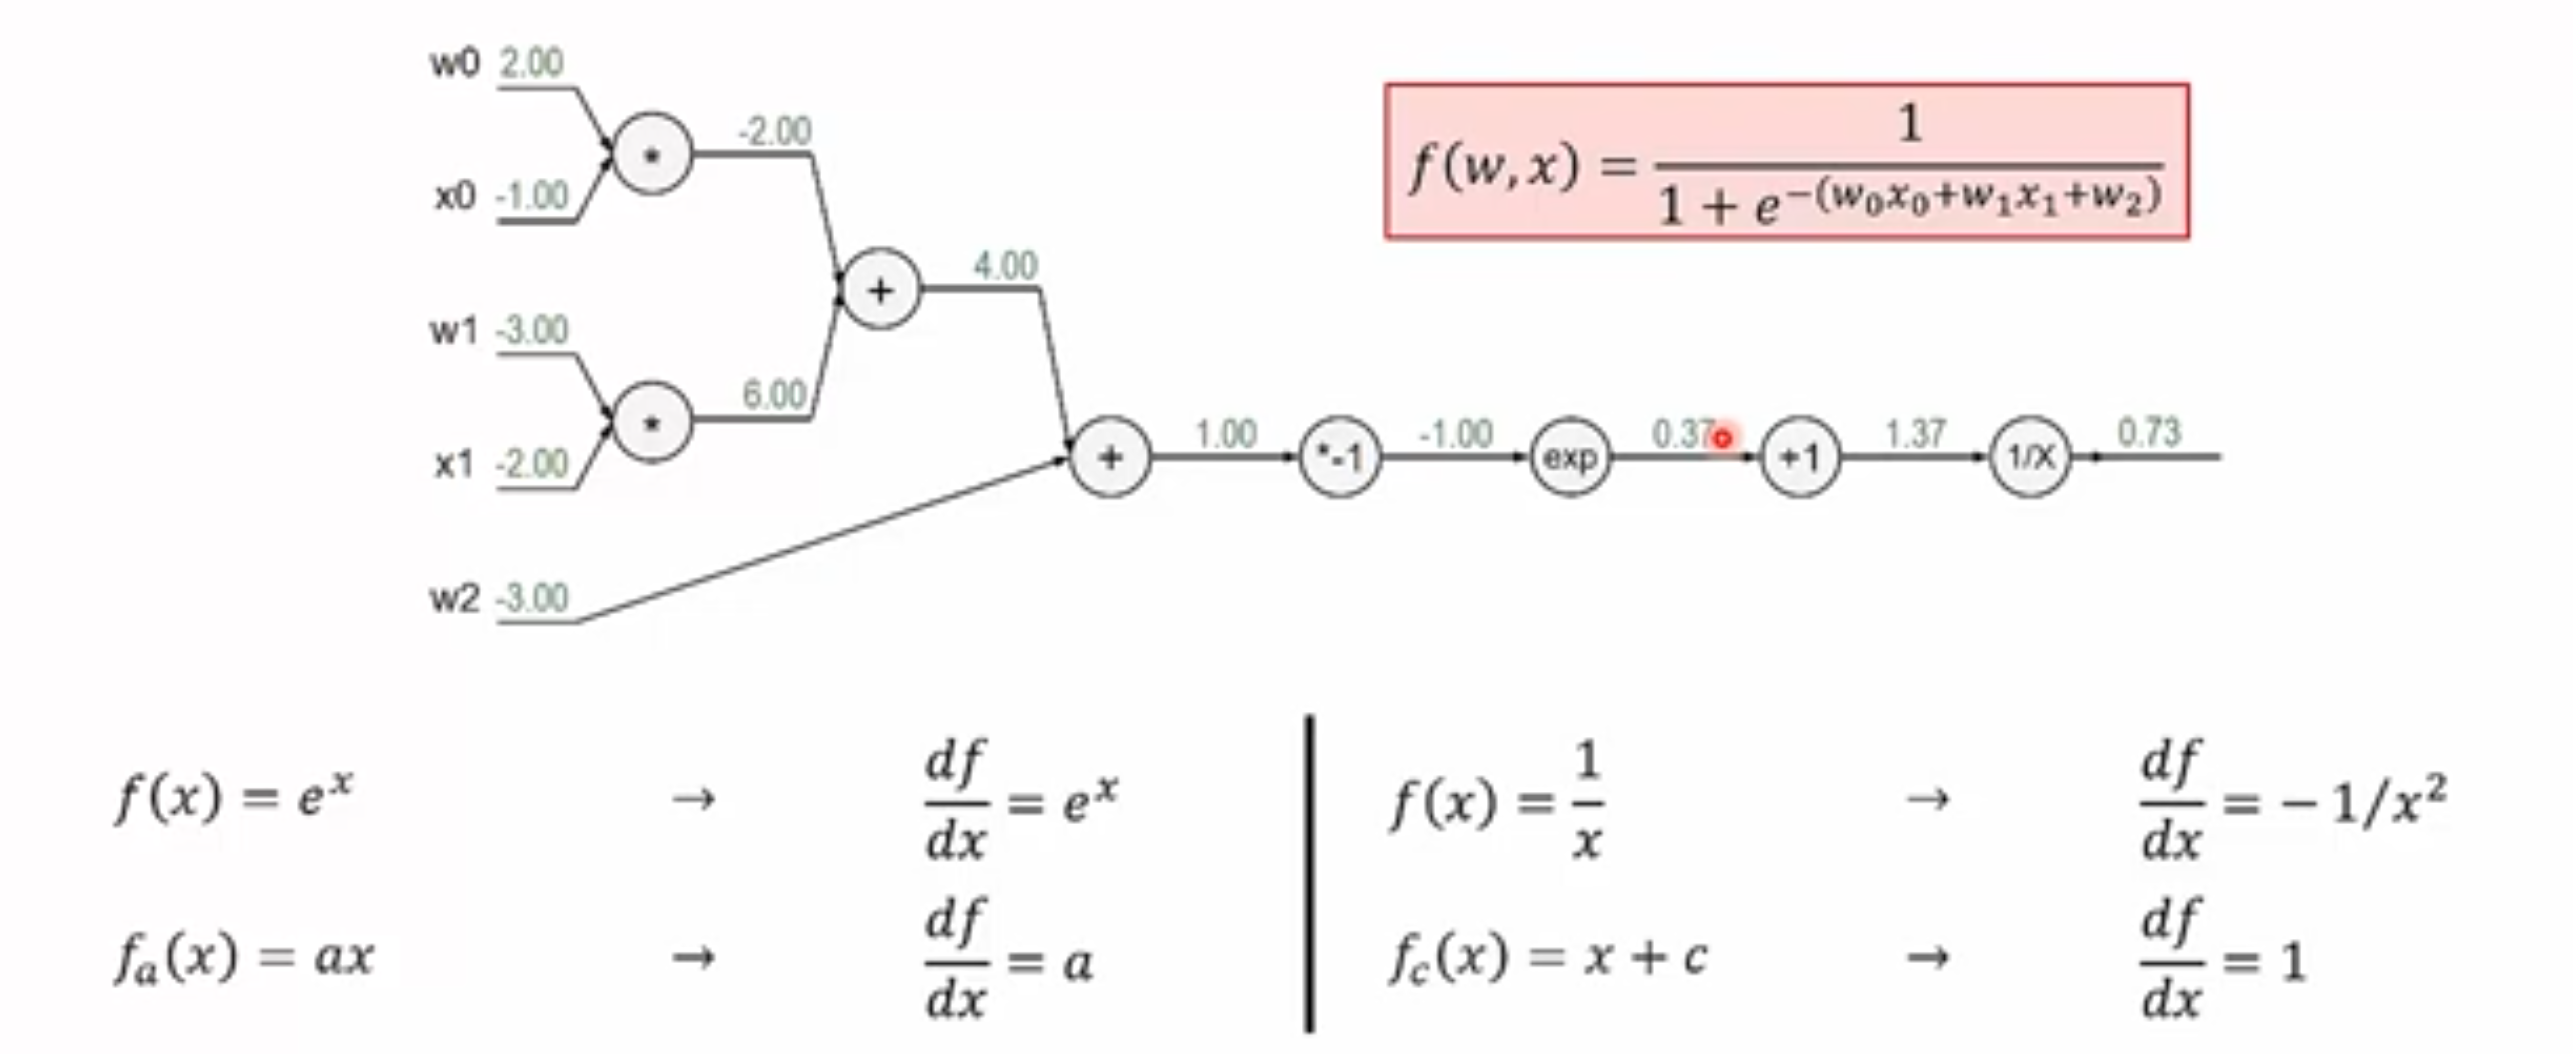
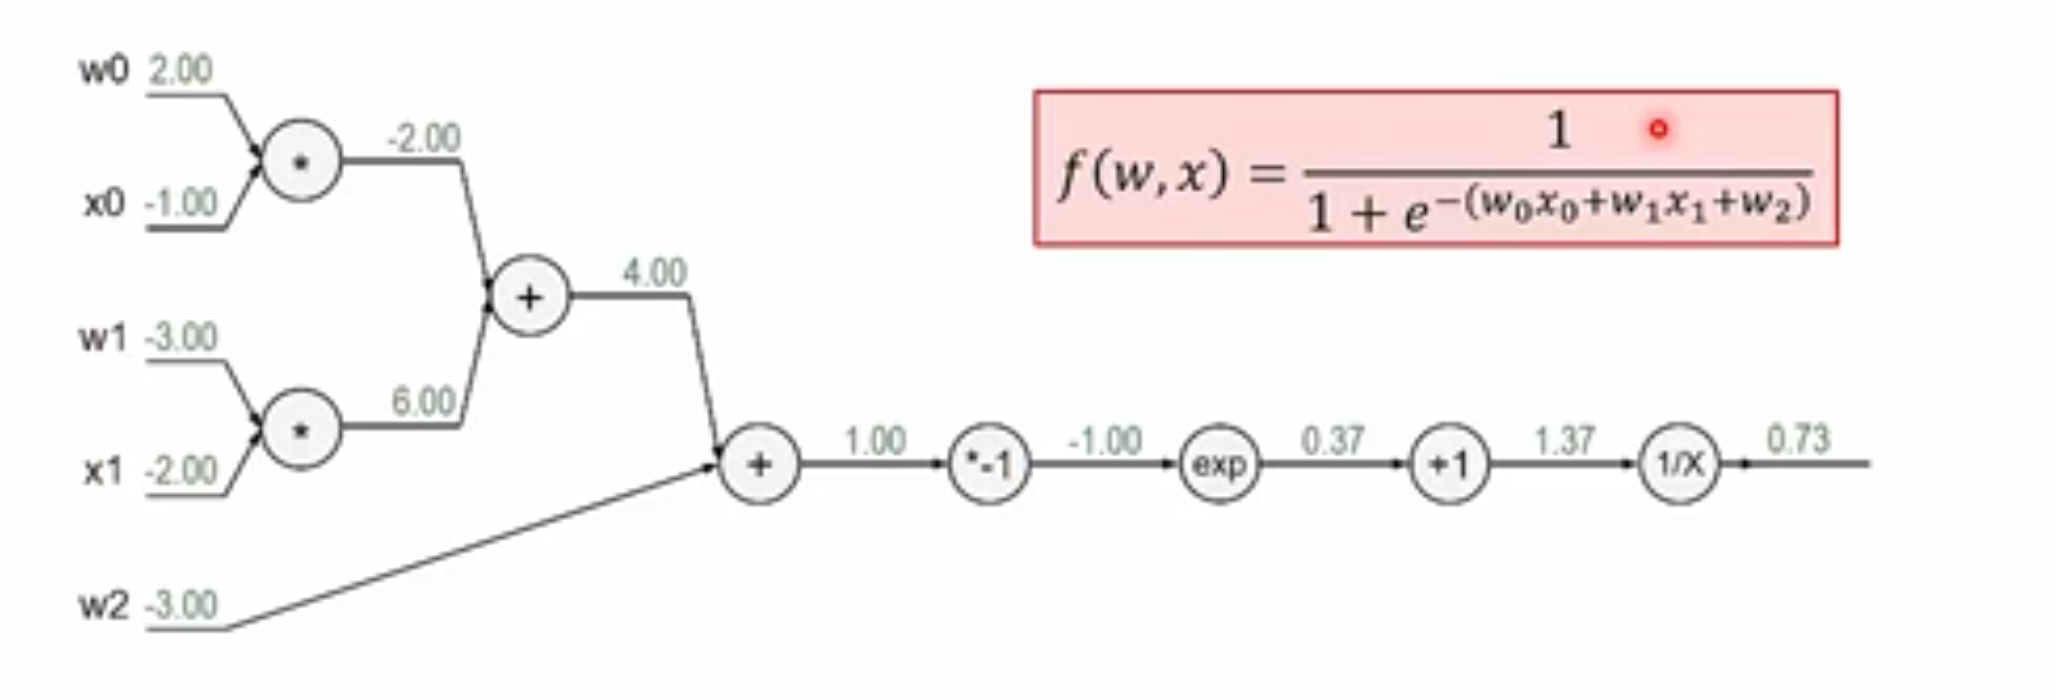